## [1] Adaptive RAG - GPT test

    **(1) 준비 과정**
    - RAG를 위한 vectorstore에 파일 embedding

In [2]:
from langchain.embeddings import OpenAIEmbeddings
from langchain.vectorstores import Chroma
from langchain.document_loaders import PyMuPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [3]:
import os
folder_path = "temp/폴더/"
pdf_files = [f for f in os.listdir(folder_path) if f.lower().endswith(".pdf")]
pdf_files

['문서_1.pdf',
 '문서_3.pdf',
 '문서_2.pdf',
 '문서_6.pdf',
 '문서_7.pdf',
 '문서_5.pdf',
 '문서_4.pdf']

In [4]:
embeddings = OpenAIEmbeddings()

/var/folders/14/q73v_xlx3_x8kr742lgx5_sh0000gn/T/ipykernel_50127/2497576997.py:1: LangChainDeprecationWarning: The class `OpenAIEmbeddings` was deprecated in LangChain 0.0.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-openai package and should be used instead. To use it run `pip install -U :class:`~langchain-openai` and import as `from :class:`~langchain_openai import OpenAIEmbeddings``.
  embeddings = OpenAIEmbeddings()


In [5]:
docs =[]

for idx in range(len(pdf_files)):
    pdf_file_path = os.path.join(folder_path, pdf_files[idx])  # 첫 번째 PDF 파일 선택
    file_name = os.path.basename(pdf_file_path)  # 파일 이름 추출
    print(f"파일: {file_name}")
    try :
        pdf_loader = PyMuPDFLoader(pdf_file_path)
        documents = await pdf_loader.aload()
        pdf_text = "\n".join([doc.page_content for doc in documents])
        TEXT_SPLITTER = RecursiveCharacterTextSplitter(chunk_size=1600, chunk_overlap=800)
        split_docs = TEXT_SPLITTER.create_documents([pdf_text])
        docs.extend(split_docs)
    
    except Exception as e:
        print(f"실패한 파일: {file_name}, 오류: {e}")

파일: 문서_1.pdf
파일: 문서_3.pdf


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/parsers/pdf.py:300: UserWarning: Warning: Empty content on page 1 of document temp/폴더/문서_1.pdf
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/parsers/pdf.py:300: UserWarning: Warning: Empty content on page 3 of document temp/폴더/문서_1.pdf
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/parsers/pdf.py:300: UserWarning: Warning: Empty content on page 5 of document temp/폴더/문서_1.pdf
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/parsers/pdf.py:300: UserWarning: Warning: Empty content on page 7 of document temp/폴더/문서_1.pdf
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/lang

파일: 문서_2.pdf


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/parsers/pdf.py:300: UserWarning: Warning: Empty content on page 0 of document temp/폴더/문서_2.pdf
  warnings.warn(


파일: 문서_6.pdf
파일: 문서_7.pdf
파일: 문서_5.pdf


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langchain_community/document_loaders/parsers/pdf.py:300: UserWarning: Warning: Empty content on page 4 of document temp/폴더/문서_6.pdf
  warnings.warn(


파일: 문서_4.pdf


In [7]:
vectordb = Chroma.from_documents(
    documents=docs,
    embedding=embeddings,
    persist_directory="./chroma_db",
    collection_name="adaptive_rag"
)

In [9]:
results = vectordb.similarity_search("신용조사 수수료", k=3)
results

[Document(metadata={}, page_content='중소ㆍ중견 수출기업 지원제도 안내  |  05\nK-SURE의 해외지사 및 전세계 신용조사기관을 통해 정보를 조사한 후 \n신청인에게 신용조사 보고서를 제공하는 서비스\n수입자 신용조사 이용절차입니다.\n   신용조사 신청 → 신용조사 및 평가 → 보고서 제공 및 조회 → 수수료 납부의 순서로 이용 \n 신용조사 신청\n・ [사이버영업점 - 국외기업신용조사 - 신청/조회 - 신용조사 신청] 메뉴 선택 \n・ 공사 DB검색 \n・ 조사방법 선택(구매/신규신청) \n・ 수입자 기본정보* 입력 → 신청완료\n* 주요정보 : 국가, 상호, 대표자명, 주소, 전화번호, 국외기업조사협조 여부, 상장 여부 등\n공사에 의한 \n신용조사 및 평가\n・ 보고서 접수(평균 조사기간 2~3주가량 소요) \n・ 접수된 보고서 검토 후 등급평가\n보고서 제공 및 조회\n・ 신청자 이메일로 보고서 발송\n・ 사이버영업점에서도 보고서 조회 가능\n(국외기업신용조사 – 신청/조회 – 신청내역/보고서 조회) 메뉴에서 조회\n수수료 납부\n・ 신청시 선택한 납부방법에 따라 납부\n- (가상계좌 입금) 세금계산서에 표시된 가상계좌로 수수료 납부\n- (신용카드 결제) 조사보고서 제공월 말일까지 결제\n*  신용카드 결제는 중소ㆍ중견기업에 한해 가능하며, 결제기일 내 카드결제가 안 된 경우에는 \n세금계산서 발급 내용에 따라 계좌이체로 납부하여야 함\n신용조사 수수료입니다.\n   조사보고서는 수출지원 차원에서 저렴하게 제공, 보고서 종류 등에 따라  수수료 상이\n보고서\n종류\n신청기업 규모\n가격(VAT 포함)\n일반조사\n재무제표미비\n신용조사 불가자/\n장기소요(40일초과)\n요약\n보고서\n중소ㆍ중견기업\n33,000원\n22,000원\n면제\n대기업\n66,000원\n22,000원\n면제\nFull Report\n중소ㆍ중견기업\n49,500원\n33,000원\n면제\n대기업\n99,000원\n33,000원\n면제\n*

In [10]:
retriever = vectordb.as_retriever(name="adaptive_rag")
retriever

VectorStoreRetriever(name='adaptive_rag', tags=['Chroma', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x110fbde50>, search_kwargs={})

**(2) Adaptive RAG basic**

In [13]:
from typing import Literal
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

In [14]:
# Data model
class RouteQuery(BaseModel):
    """Route a user query to the most relevant datasource."""
    
    datasource: Literal["file_search", "common"] = Field(
        description="""Given a user question choose to route it to file_search or a common"""
    )
    

In [15]:
from langchain_openai import ChatOpenAI
gpt = ChatOpenAI(model="gpt-4o-mini", temperature=0)

structured_llm_router = gpt.with_structured_output(RouteQuery)
structured_llm_router

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x17a6e9b50>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x1326f65d0>, root_client=<openai.OpenAI object at 0x107f18050>, root_async_client=<openai.AsyncOpenAI object at 0x179c6e090>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'RouteQuery', 'description': 'Route a user query to the most relevant datasource.', 'parameters': {'properties': {'datasource': {'description': 'Given a user question choose to route it to file_search or a common', 'enum': ['file_search', 'common'], 'type': 'string'}}, 'required': ['datasource'], 'type': 'object'}}}], 'parallel_tool_calls': False, 'tool_choice': {'type': 'function', 'function': {'name': 'RouteQuery'}}}, config={}, config_factories=[])
| PydanticToolsParser(first_tool_only=True, tools=[<class '__main__.Ro

In [20]:
#Prompt

from langchain_core.messages import HumanMessage, SystemMessage

system = """You are an expert at routing user questions to file_search.
file_search contains documents related to trade, policy, transactions, sales, agency opinions, terms and conditions, exemptions by business type, and website business guide materials.
If a question is related to Credit Inquiry, policies, trade support programs, transaction regulations, exemptions, or business-related guidelines, always route it to file_search.
For all other general inquiries, route them to common.
"""

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

print(route_prompt.pretty_print())

================================ System Message ================================

You are an expert at routing user questions to file_search.
file_search contains documents related to trade, policy, transactions, sales, agency opinions, terms and conditions, exemptions by business type, and website business guide materials.
If a question is related to Credit Inquiry, policies, trade support programs, transaction regulations, exemptions, or business-related guidelines, always route it to file_search.
For all other general inquiries, route them to common.


================================ Human Message =================================

{question}
None


In [21]:
question_router = route_prompt | structured_llm_router

question_router

ChatPromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are an expert at routing user questions to file_search.\nfile_search contains documents related to trade, policy, transactions, sales, agency opinions, terms and conditions, exemptions by business type, and website business guide materials.\nIf a question is related to Credit Inquiry, policies, trade support programs, transaction regulations, exemptions, or business-related guidelines, always route it to file_search.\nFor all other general inquiries, route them to common.\n'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['question'], input_types={}, partial_variables={}, template='{question}'), additional_kwargs={})])
| RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x17a6e9b50>

In [22]:
print(
    question_router.invoke(
        {"question": "안녕?"}
    )
)


print(question_router.invoke({"question" : "신용조사 수수료 얼마야?"}))

datasource='common'
datasource='file_search'


In [23]:
question = "신용조사 수수료가 얼마인가요"

In [24]:
#Retrieval Grader

# Data model

class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""
    
    binaray_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
        
    )

In [25]:
structured_llm_grader = gpt.with_structured_output(GradeDocuments)
structured_llm_grader

RunnableBinding(bound=ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x17a6e9b50>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x1326f65d0>, root_client=<openai.OpenAI object at 0x107f18050>, root_async_client=<openai.AsyncOpenAI object at 0x179c6e090>, model_name='gpt-4o-mini', temperature=0.0, model_kwargs={}, openai_api_key=SecretStr('**********')), kwargs={'tools': [{'type': 'function', 'function': {'name': 'GradeDocuments', 'description': 'Binary score for relevance check on retrieved documents.', 'parameters': {'properties': {'binaray_score': {'description': "Documents are relevant to the question, 'yes' or 'no'", 'type': 'string'}}, 'required': ['binaray_score'], 'type': 'object'}}}], 'parallel_tool_calls': False, 'tool_choice': {'type': 'function', 'function': {'name': 'GradeDocuments'}}}, config={}, config_factories=[])
| PydanticToolsParser(first_tool_only=True, tools=[<class '__main__.GradeDocuments'>])

In [27]:
# Prompt
system = """You are a grader assesssing relevance of a retrieved documents to a user question. \n
If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant \n
It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""


grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User qusetion : {question}")
    ]
)

retrieval_grader = grade_prompt | structured_llm_grader
docs = retriever.invoke(question)
doc_text = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document":doc_text}))

binaray_score='no'


In [29]:
doc_text

'8. 자주하는 질문(FAQ)\n단기수출보험 한도를 받았는데 이걸로 보험에 든 것인지요?\n한도를 부여받은 것만으로는 보험관계가 성립하지 않습니다. 수출통지를 함으로써 보험관계가 성립\n되며, 이에 대한 보험료까지 납부가 완료되어야 보험계약이 체결된 것입니다. (단, 수출통지 필요 \n종목에 한 함)\n또한 수출통지를 한 경우에도 통지 지연, 인수한도 초과, 수출자 또는 수입자 등급 제한 등의 사유로 \n보험관계가 성립되지 않은 수출통지건은 반송되오니 통지건에 대한 최종 보험관계 성립 여부를 \n확인하시기 바랍니다. \nQ\nA\n선적을 이미 하였는데, 단기수출보험 가입(한도책정)이 가능한가요?\n이미 수출물품을 선적한 후에는 단기수출보험 가입(한도책정)이 불가능합니다. K-SURE의 한도책정 \n소요시간을 감안하여 수출자는 최소 선적 10일 이전에 보험한도를 신청(청약) 하시어 선적 전에 \n보험한도를 책정받으시기 바랍니다.\nQ\nA\n수입자와 오랜 기간 거래했는데 통상적으로 만기가 지난 일부 미수금이 있습니다. 이 경우 \n단기수출보험 청약을 하면 가능한지요?\n만기경과 미결제금액이 있는 경우, 보험청약이 제한되게 됩니다. 수출입자간 미결제금액 결제 완료 \n후 보험청약을 진행해 주시기 바랍니다.\nQ\nA\n위탁가공무역과 중계무역의 차이는 무엇인지요?\n공사 약관상 위탁가공무역은 국내기업의 해외현지법인이 생산, 가공한 물품 또는 국내기업이 위탁\n하여 외국에서 가공한 물품을 수출하는 계약이며, \n중계무역은 수출을 목적으로 물품을 수입하여 제3국으로 수출하는 거래로 정의됩니다. 중계무역은 \n수입가격과 수출가격의 차이를 이용한 중계수수료 수취에 주목적이 있고, 국내 산업 발전 및 고용 \n창출에 기여하는 바가 상대적으로 적기 때문에 수출보험 이용시 건별인수가 원칙인 등 위탁가공무역 \n대비 제한사항이 많습니다.\nQ\nA\nL/C 은행이 인수가능 은행인지 여부를 어디서 확인 가능한가요?\n사이버영업점 > 조회서비스 > 기업/국외은행 > 국외은행조회\nQ

In [31]:
## Generate

from langchain import hub
from langchain_core.output_parsers import StrOutputParser

prompt = hub.pull('rlm/rag-prompt')

def format_cods(docs):
    return "\n\n".join(doc.page_content for doc in docs)

rag_chain = prompt | gpt | StrOutputParser()

generation = rag_chain.invoke({"context": docs, "question": question})
print(generation)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/langsmith/client.py:241: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


신용조사 수수료에 대한 구체적인 정보는 제공된 문서에 포함되어 있지 않습니다. 따라서 신용조사 수수료가 얼마인지에 대한 답변을 드릴 수 없습니다.


In [32]:
### Hallucination Grader

#Data model

class GradeHallucinations(BaseModel):
    """Binary score for hallucination persent in generation answer."""
    
    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no"

    )
    
structured_llm_grader = gpt.with_structured_output(GradeHallucinations)

system = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts.
Give a binary score 'yes' or 'no'. 'Yes means that the answer is grounded in / supported by the set of facts."""

hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Set of facts : \n\n {documents} \n\n LLM generation : {generation}"),
    ]
)

hallucination_grader = hallucination_prompt  | structured_llm_grader
hallucination_grader.invoke({"documents": docs, "generation" : generation})

GradeHallucinations(binary_score='no')

In [33]:
### Answer Grade

# Data model
class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""
    binary_score : str = Field(
        description="Answer addresses the quesiton, 'yes' or 'no'"
    )
    
structured_llm_grader = gpt.with_structured_output(GradeAnswer)

system = """You are a grader assessing whether an answer addresses / resolves a question
Give a binary score 'yes' or 'no'. 'Yes' means that the answer resolves the question."""

answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question: \n\n{question} \n\n LLM generation: {generation}")
    ]
)

answer_grader  = answer_prompt | structured_llm_grader
answer_grader.invoke({"question": question, "generation" : generation})


GradeAnswer(binary_score='no')

In [34]:
### Question Re-writer

system = """Your a question re-writer that converts an input question to a better version that is optimized for
vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning.
Answer the question language."""


re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", """Here is the initial question : \n\n {question} Formulate an improved question.
         """)
    ]
)

question_rewriter = re_write_prompt | gpt | StrOutputParser()
question_rewriter.invoke({"question" : question})

'신용조사 서비스의 수수료는 얼마인가요?'

**general prompt**

In [35]:
from langchain_core.prompts import ChatPromptTemplate

In [36]:
system = """Tell the user that you can't find the relevant documentation and are replacing it with a general answer.
Then, answer the user's question in the **same language** as the question was asked.
Detect the language of the user's question and ensure your response is in that language.
If the question is in Korean, respond in Korean. If it's in another language, use that language."""

llm_answer_template = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question (maintain original language):\n{question}")
    ]
)


llm_answer_template.pretty_print()

================================ System Message ================================

Tell the user that you can't find the relevant documentation and are replacing it with a general answer.
Then, answer the user's question in the **same language** as the question was asked.
Detect the language of the user's question and ensure your response is in that language.
If the question is in Korean, respond in Korean. If it's in another language, use that language.

================================ Human Message =================================

User question (maintain original language):
{question}


In [38]:
llm_generate_chain = llm_answer_template | gpt
llm_generate_chain.invoke("중소기업 수수료는 얼마일까요?").content

'관련 문서를 찾을 수 없어 일반적인 답변으로 대체하겠습니다.\n\n중소기업의 수수료는 업종, 거래 규모, 서비스 제공업체에 따라 다를 수 있습니다. 일반적으로 은행이나 결제 서비스 제공업체에서 부과하는 수수료는 1%에서 3% 사이일 수 있으며, 특정 서비스나 계약 조건에 따라 달라질 수 있습니다. 보다 정확한 정보는 해당 서비스 제공업체에 직접 문의하는 것이 좋습니다.'

In [40]:
class ReWriteQuery(BaseModel):
    """Re-writer that converts an input question to a better version that is optimized for vectorstore retrieval
    The output is in the same language as the input question."""
    query: str = Field(
        description="""Rewrites the input question to be grammatically correct and clearly convey its meaning while optimizing it for better retrieval in a vector store. 
        The output is in the same language as the input question."""

    )

In [41]:
from langchain.output_parsers import PydanticOutputParser
structured_llm_grader = PydanticOutputParser(pydantic_object=ReWriteQuery)

In [43]:
from langchain_core.prompts import PromptTemplate

system = """Your a question re-writer that converts an input question to a better version that is optimized for
vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning.
Answer the question language."""

In [44]:
re_write_template = PromptTemplate.from_template(
    template= "{system}\nHere is the initial question : \n\nFormulate an improved question. \n{format_instructions}\n#input question:\n{question}",
    partial_variables={"system":system, 'format_instructions':structured_llm_grader.get_format_instructions()}
)

re_write_template.pretty_print()

Your a question re-writer that converts an input question to a better version that is optimized for
vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning.
Answer the question language.
Here is the initial question : 

Formulate an improved question. 
The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"description": "Re-writer that converts an input question to a better version that is optimized for vectorstore retrieval\nThe output is in the same language as the input question.", "properties": {"query": {"description": "Rewrites the input qu

In [45]:
from langchain_core.runnables import RunnableLambda

question_rewriter = (
    RunnableLambda(lambda input_dict: re_write_template.format(**input_dict))
    | RunnableLambda(lambda prompt : gpt.invoke(prompt).content)
    | structured_llm_grader
)

answer = question_rewriter.invoke({"question" : question})
answer

ReWriteQuery(query='신용조사 수수료의 정확한 금액은 얼마인가요?')

In [46]:
re_docs = docs = retriever.invoke(answer.query)
re_doc_text = re_docs[1].page_content

re_generation = rag_chain.invoke({"context": re_docs, "question": answer.query})

In [47]:
re_docs[0]

Document(metadata={}, page_content='5. 신용조사 수수료 및 납부방법\n \x07신용조사 수수료(VAT 포함 가격)\n보고서종류\n기업규모\n일반\n재무제표 미비*\n신용조사 불가자 또는 \n장기소요(40일 초과)\n요약보고서\n중소중견기업\n33,000원\n22,000원\n면제\n대기업\n66,000원\nFull Report\n중소중견기업\n49,500원\n33,000원\n대기업\n99,000원\n* 주요 재무정보만 있는 경우도 포함\n• \x07K-SURE는 고객의 원활한 대외거래를 지원하기 위해 상당 규모의 조사비용을 자체적으로 부담하고 있습니다. \n 수수료 청구 및 납부방법\n수납방식\n청구방법\n납부\n가상계좌\n입금\n• \x07당월 중 조사완료건 전체에 대한 수수료 일괄 청구 및 세금\n계산서 발행 \n☞ 조사 완료일 익월 첫영업일\n☞ \x07마스터대표사용자 및 신청자에게 이메일로 발송되며, 모든 \n사용자가 사이버영업점에서 조회 가능\n• \x07일괄 납부\n☞ 조사 완료일 익월 27일까지\n신용카드\n• 조사완료시 건별 납부안내\n• 건별 납부(사이버영업점)\n☞ 조사 완료일 당월 말일까지\n6. 국가별 신용조사기관 및 Full Report 제공 여부 \n지 역\n조사기관*\nFull Report 제공 여부\n아시아\n중국\nEXPERIAN\nO\n태국\nINRA\nO\n말레이시아\nBASIS\nO\n베트남\nVNCR\nO\n인도, 몽골, 미얀마, 캄보디아, 방글라데시, 파키스탄, \n네팔, 부탄, 스리랑카, 라오스, 몰디브, 브루나이\nUCS\nO\n일본, 홍콩, 싱가포르, 인도네시아, \n기타 아시아 국가\nD&B\nX\n미주\n미국, 브라질, 아르헨티나,\n멕시코, 콜롬비아, 에콰도르\nD&B\nX\n캐나다\nWORLDBOX\nX\n페루 포함 기타 중남미 국가\nCRLA/DRR\nO\n대양주\n호주\nD&B\nX\n뉴질랜드 및 기타 대양주 국가\nCCR\nO\n서유럽\n영국, 아일랜드, 프랑스, 네덜란드\n

In [50]:
from pprint import pprint

pprint(generation)

('신용조사 수수료에 대한 구체적인 정보는 제공된 문서에 포함되어 있지 않습니다. 따라서 신용조사 수수료가 얼마인지에 대한 답변을 드릴 수 '
 '없습니다.')


In [52]:
question

'신용조사 수수료가 얼마인가요'

In [53]:
answer.query

'신용조사 수수료의 정확한 금액은 얼마인가요?'

In [54]:
pprint(re_generation)

('신용조사 수수료는 기업 규모에 따라 다르며, 중소중견기업의 경우 요약보고서는 33,000원, 풀 리포트는 49,500원입니다. 대기업의 '
 '경우 요약보고서는 66,000원, 풀 리포트는 99,000원입니다. 모든 금액은 VAT 포함 가격입니다.')


## Contruct the Graph

In [57]:
## Define Graph State

from typing import List
from typing_extensions import TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.
    
    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents"""
        
    question:str
    generation:str
    retrieve_count:int
    documents: List[str]

In [75]:
from langchain.schema import Document


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state.get("question", "")
    documents = state.get("documents", [])
    retrieve_count = state.get("retrieve_count", 0)
    generation = llm_generate_chain.invoke(question)
    
    
    if retrieve_count >= 5:
        print("---RETRIEVAL LIMIT REACHED, STOPPING PROCESS--")
        return {"documents" : [], "qusetion": question, "retrieve_count": retrieve_count, "generation" : generation}

    # Retrieval
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question, "retrieve_count": retrieve_count+1, "generation" : generation}


def llm_generate_answer(state):
    """
    Generates a general LLM answer when retrieval fails after 5 attempts.
    """
    
    print("---GENERAL ANSWER---")
    question = state.get("question", "")
    documents = state.get("documents", [])
    retrieve_count = state.get("retrieve_count", 0)
    generation = llm_generate_chain.invoke(question)
    
    if isinstance(generation, str):
        return {"documents": documents, "question": question, "retrieve_count": retrieve_count, "generation" : generation}
    else:
        return {"documents": documents, "question": question, "retrieve_count": retrieve_count, "generation" : generation.content}


def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state.get("question", "")
    documents = state.get("documents", [])
    retrieve_count = state.get("retrieve_count", 0)
    generation = rag_chain.invoke({"context": documents, "question": question})
    
    if isinstance(generation, str):
        return {"documents": documents, "question": question, "retrieve_count": retrieve_count, "generation" : generation}
    else:
        return {"documents": documents, "question": question, "retrieve_count": retrieve_count, "generation" : generation.content}



def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state.get("question", "")
    documents = state.get("documents", [])
    retrieve_count = state.get("retrieve_count", 0)
    generation = rag_chain.invoke({"context": documents, "question": question})
    

    # Score each doc
    filtered_docs = []
    try:
        for d in documents:
            score = retrieval_grader.invoke(
                {"question": question, "document": d.page_content}
            )
            grade = score.binary_score
            if grade == "yes":
                print("---GRADE: DOCUMENT RELEVANT---")
                filtered_docs.append(d)
            else:
                print("---GRADE: DOCUMENT NOT RELEVANT---")
    except:
        pass
    return {"documents": filtered_docs, "question": question, "retrieve_count": retrieve_count, "generation" : generation, "fallback": not bool(filtered_docs)}



def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state.get("question", "")
    documents = state.get("documents", [])
    retrieve_count = state.get("retrieve_count", 0)
    generation = rag_chain.invoke({"context": documents, "question": question})
    
    if isinstance(generation, str):
        pass
    else:
        generation = generation.content

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    
    if isinstance(better_question, str):
        return {"documents": documents, "question": better_question, "retrieve_count": retrieve_count, "generation" : generation}
    else:
        print(better_question)
        return {"documents": documents, "question": better_question.query, "retrieve_count": retrieve_count, "generation" : generation}

        


### Edges ###


def route_question(state):
    """
    Route question to web search or RAG.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """

    print("---ROUTE QUESTION---")
    question = state.get("question", "")
    source = question_router.invoke({"question": question})
    if source.datasource == "file_search":
        print("---ROUTE QUESTION TO RAG---")
        return "file_search"
    elif source.datasource == "common":
        print("---ROUTE QUESTION TO GENERAL ANSWER---")
        return "common"


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state.get("question","")
    filtered_documents = state.get("documents",[])

    if not filtered_documents:
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"


def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """

    print("---CHECK HALLUCINATIONS---")
    question = state.get("question", "")
    documents = state.get("documents", [])
    generation = state.get("generation", "")

    score = hallucination_grader.invoke(
        {"documents": documents, "generation": generation}
    )
    grade = score.binary_score

    if grade == "yes":
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        # Check question-answering
        print("---GRADE GENERATION vs QUESTION---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes":
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        else:
            print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            return "not useful"
    else:
        print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"

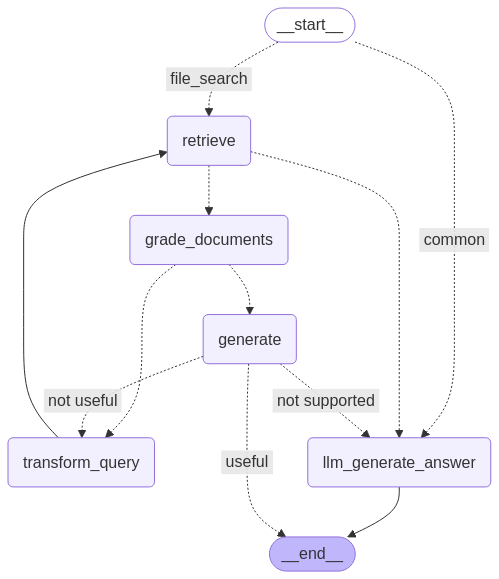

In [76]:
from langgraph.graph import END, StateGraph, START
workflow = StateGraph(GraphState)
# Define the nodes
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)
workflow.add_node("transform_query", transform_query)
workflow.add_node("llm_generate_answer", llm_generate_answer)

# Build graph
workflow.add_conditional_edges(
    START,
    route_question,
    {
        "file_search": "retrieve",
        "common": "llm_generate_answer",
    },
)

workflow.add_conditional_edges(
    "retrieve",
    lambda state: "llm_generate_answer" if state.get("retrieve_count", 0) >= 5 else "grade_documents",
    {
        "llm_generate_answer": "llm_generate_answer",
        "grade_documents": "grade_documents",
    },
)


workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "retrieve")
workflow.add_conditional_edges(
    "generate",
    lambda state: "generate" if state.get("retrieve_count", 0) >= 5 else grade_generation_v_documents_and_question(state),
    {
        "not supported": "llm_generate_answer",
        "useful": END,
        "not useful": "transform_query",
    },
)
workflow.add_edge("llm_generate_answer", END)
# Compile
app = workflow.compile()
app

In [77]:
sample = "중소기업 수수료는 얼마인가요"
inputs = {"question": sample}
for output in app.stream(inputs):
    for key, value in output.items():
        for k, v in output.items():
            print(output[k])

---ROUTE QUESTION---
---ROUTE QUESTION TO RAG---
---RETRIEVE---
{'documents': [Document(metadata={}, page_content='중소ㆍ중견 수출기업 지원제도 안내  |  23\n  중소ㆍ중견기업 특별지원제도\n16\n중소ㆍ중견기업 우대 혜택을 소개합니다.\n   \n  중소ㆍ중견기업에 대해 보험ㆍ보증료 할인, 부보율 우대 등 지원책을 시행 중이며, \n특히 유망 중소ㆍ중견기업, 창업, 벤처, 수출초보기업 등에 대해 추가 우대 혜택 제공\n   유망중소중견기업\n 혁신형 중소기업(벤처기업, 이노비즈기업, 경영혁신기업)\n 중소기업수출지원센터 지정 글로벌강소기업 1000+ 선정기업(유망기업, 성장기업, 강소기업, 강소+기업)\n 산업통상자원부 지정 세계일류상품 인증기업\n KOTRA 지정 글로벌브랜드사업 선정기업, U턴 기업 등\n   수출초보기업 무역보험 지원\n  수출 창업 및 벤처기업을 활성화하고, 내수기업의 수출기업화를 촉진하며, 수출 초보 기업을 중점적으로 \n육성하기 위한 우대 지원 시행\n구분\n대상 기업\n우대 혜택\n수출초보기업 \n무역보험 \n우대지원\n・ 산업부 「내수기업의 수출기업화」 사업 \n당해연도 참여 기업 \n・ 내수 중견기업의 수출기업 전환을 위해 \n산업부가 시행하는 사업 당해연도 참여 \n기업\n・ 최근 1년(또는 전년도) 직수출실적 \n100만불 이하 중소ㆍ중견 기업\n・ 수출신용보증(선적전, 선적후, 매입), \n단기수출보험 한도 우대(최대 1.5배 \n이내), 보증료 할인(최대 30% 이내)\n・수입자 신용조사 수수료 연간 5회 면제\n수출성장금융\n・ 수출시작을 위한 운전자금 융자 지원 \n수출계획이 있는 기업이면 하나, 신한, \n우리, 경남은행을 통해 진행 가능\n *  기존 무역금융 이용기업은 중복이용 불가\n시행기간\n・수출초보기업 무역금융 우대지원 : ’24.12.31까지\n・수출성장금융 : 하나, 신한, 우리, 경남은행별 확인요망\n  

In [79]:
output

{'llm_generate_answer': {'documents': [Document(metadata={}, page_content='중소ㆍ중견 수출기업 지원제도 안내  |  23\n  중소ㆍ중견기업 특별지원제도\n16\n중소ㆍ중견기업 우대 혜택을 소개합니다.\n   \n  중소ㆍ중견기업에 대해 보험ㆍ보증료 할인, 부보율 우대 등 지원책을 시행 중이며, \n특히 유망 중소ㆍ중견기업, 창업, 벤처, 수출초보기업 등에 대해 추가 우대 혜택 제공\n   유망중소중견기업\n 혁신형 중소기업(벤처기업, 이노비즈기업, 경영혁신기업)\n 중소기업수출지원센터 지정 글로벌강소기업 1000+ 선정기업(유망기업, 성장기업, 강소기업, 강소+기업)\n 산업통상자원부 지정 세계일류상품 인증기업\n KOTRA 지정 글로벌브랜드사업 선정기업, U턴 기업 등\n   수출초보기업 무역보험 지원\n  수출 창업 및 벤처기업을 활성화하고, 내수기업의 수출기업화를 촉진하며, 수출 초보 기업을 중점적으로 \n육성하기 위한 우대 지원 시행\n구분\n대상 기업\n우대 혜택\n수출초보기업 \n무역보험 \n우대지원\n・ 산업부 「내수기업의 수출기업화」 사업 \n당해연도 참여 기업 \n・ 내수 중견기업의 수출기업 전환을 위해 \n산업부가 시행하는 사업 당해연도 참여 \n기업\n・ 최근 1년(또는 전년도) 직수출실적 \n100만불 이하 중소ㆍ중견 기업\n・ 수출신용보증(선적전, 선적후, 매입), \n단기수출보험 한도 우대(최대 1.5배 \n이내), 보증료 할인(최대 30% 이내)\n・수입자 신용조사 수수료 연간 5회 면제\n수출성장금융\n・ 수출시작을 위한 운전자금 융자 지원 \n수출계획이 있는 기업이면 하나, 신한, \n우리, 경남은행을 통해 진행 가능\n *  기존 무역금융 이용기업은 중복이용 불가\n시행기간\n・수출초보기업 무역금융 우대지원 : ’24.12.31까지\n・수출성장금융 : 하나, 신한, 우리, 경남은행별 확인요망\n   ESG경영 인증기업 무역보험 지원\n  중소중견기업 ESG경영 활성화를

In [82]:
pprint(output['llm_generate_answer']['generation'])

('죄송하지만 관련 문서를 찾을 수 없어 일반적인 답변으로 대체하겠습니다. \n'
 '\n'
 '중소기업의 수수료는 업종, 거래 규모, 서비스 제공업체에 따라 다를 수 있습니다. 일반적으로 결제 수수료는 1%에서 3% 사이이며, 특정 '
 '서비스나 플랫폼에 따라 다르게 책정될 수 있습니다. 보다 정확한 정보는 해당 서비스 제공업체에 직접 문의하시거나, 관련 업계의 자료를 '
 '참고하시는 것이 좋습니다.')
